In [1]:
from locallib import *

# Assignment 2


*Please fill out the relevant cells below according to the instructions. When done, save the notebook and export it to PDF, upload both the `ipynb` and the PDF file to Canvas.*

## Group Members

*Group submission is highly encouraged. If you submit as part of group, list all group members here. Groups can comprise up to 4 students.*

* Andre Beukers
* Alex Johnson

---

## Problem 1: Design the Optimal Peak Detection System (3pts)

A common problem in the analysis event data is the precise localization of a peak with a known form, say a Gaussian. We generally have two options. 

1. We can perform direct density estimation given the known parametric form, which is equivalent to a GMM with $K=1$. 
2. We can form a histogram, which turns event locations into counts per bin, and then fit a Gaussian to the pairs $(x_k, N_k)$ of (mean) bin location and counts. 

**Side note:** 
For image analysis, where the peak could be e.g. a small tree on a satellite photo, we have don't have that choice. It's always option 2 because the incoming photons are automatically binned into pixels by the detector in the camera.

### Step 1 (2pts)

Compare the uncertainty of the center estimation in these two cases as a function of the total event number $N$. Specifically, assume a standard normal distribution (i.e. $\sigma=1$) for the generating process. Draw $N$ events. 

For case 1, determine the mean $\tilde\mu$ of the event distribution.
For case 2, bin the samples with a bin width $\Delta=1$. That gives you a set of bin centers and counts $\mathcal{D}=\lbrace (x_1,N_1), \dots, (x_K,N_K)\rbrace$. The likelihood for each bin is Poissonian, with a mean rate $\lambda_k$ that follows a Gaussian parametric form. But the Gaussian shape also needs to be integrated in the bins:

$$
\lambda_k = \frac{N}{\sqrt{2\pi}\sigma} \int_{x_k - \Delta/2}^{x_k + \Delta/2} \exp\left(-\frac{1}{2\sigma^2}(x - \mu)^2\right) dx = \frac{N}{2} \left[\mathrm{erf}\left(\frac{\Delta/2 - (x_k - \mu)}{\sqrt{2} \sigma}\right) + \mathrm{erf}\left(\frac{x_k - \mu + \Delta/2}{\sqrt{2} \sigma}\right)\right]
$$

for some unknown $\mu$. $\mathrm{erf}$ stands for the [Error function](https://en.wikipedia.org/wiki/Error_function). Use `scipy.optimize` to find the MLE $\tilde\mu_b$. 

Repeat the process multiple times, plot $p(\tilde\mu)$ and $p(\tilde\mu_b)$, and compute their mean and variances. Repeat with different $N$.

### response

skl GMM https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture

In [2]:
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import KernelDensity

In [3]:

N = 100
M = 2
for m in range(M):
  m
  
# draw N events
X = stats.norm.rvs(loc=0,scale=1,size=(N)).reshape(-1,1)
# case: GMM K=1
gm = GaussianMixture(n_components=1)
gm.fit(X)
# case: KDE with gaussian kernel
kde = KernelDensity(kernel='gaussian',bandwidth=1) ## verify this corresponds to stdev=1 (i.e. not var=1)
kde.fit(X).sample(N).mean()


-0.07746692698441879

### case 2
- scipy erf https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.erf.html
- scipy optimize https://docs.scipy.org/doc/scipy/tutorial/optimize.html

- I think $\tilde\mu_b$ refers to $\mu$ term in the erf. 
- is the $\mu$ in the erf specific to each bin? 
    - i.e. would the more appropriate notation be $\mu_k$?

(array([ 0.,  0.,  2., 14., 34., 36., 13.,  1.,  0.,  0.]),
 array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.]),
 <BarContainer object of 10 artists>)

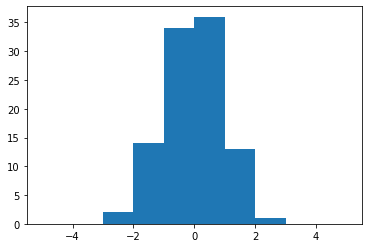

In [4]:
# case2 :histogram with bins
bins = np.arange(-5,5.1,1)
np.histogram(X,bins=bins)
ax = plt.gca()
ax.hist(X,bins=bins)

### Step 2 (1pt)

Assume that your instrument only reports binned event counts. Determine the MLE of the bin width $\Delta$ as a function of the sample size $N$.

## Problem 2: Clustering Hyper-Spectral Images (3pts)

Hyper-spectral images of a scene are recorded in hundreds of wavelengths, typically extending beyond the range perceptible by humans. They play a critical role in remote sensing from aerial and satellite platforms because they allow us to infer e.g. where roads or vegetation are (even under clouds), how well crops grow, the salinity of water...

Often, we don't know a priori what is recorded in a particular hyper-spectral data set. Unsupervised clustering is then a way to identify interesting structures. Download [this](https://github.com/fred3m/hyperspectral/blob/master/data/subset.npy) hyper-spectral data set, [taken from an airplane](https://doi.org/10.1117/12.157055) flying over Capitol Hill in Washington, D.C. It consists of 191 spectral channels, each having 200 x 200 pixels. Then pick 2 different clustering algorithms and attempt to identify interesting structures. This will typically require some tinkering with parameter settings. When done, compare what the two clustering algorithms found and try to explain why the outcomes differ on the basis of the assumptions made by the algorithms.

**Hint:** The data are stored in the layout `(N_channels, N_pixels)`, with each 2D image flattened into a single long vector. This treats every channel as an independent sample with a vector of intensity variations per pixel. Alternatively, you can flip the axes into the layout `(N_pixels, N_channels)`, which treat every pixel as an independent sample with a vector of intensity variations per channel. Both of these are valid, as are hybrids and subsets. Decide which of them you want to use.

**Hint 2:** For visualization, it's best to reshape the pixel vector from `(N_pixels)` to `(N_pixels_vertical, N_pixels_horizontal)`. Also, Google Map/Earth could turn out to be useful for your visual orientation.

In [5]:
import numpy as np
X = np.load('subset.npy')
nchanels,npixels = X.shape


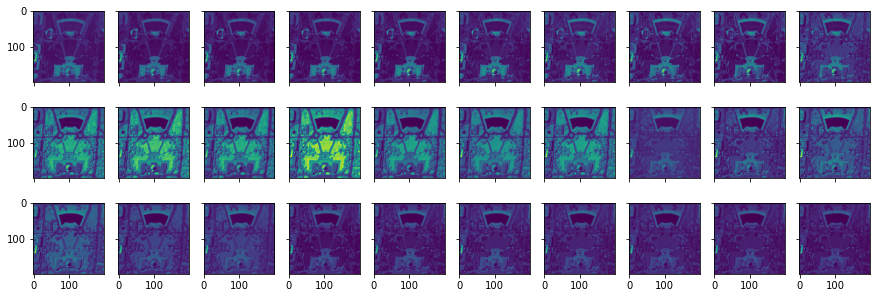

In [6]:
def plt_some_X(X):
  Xim = X.reshape(191,200,200)
  f,axar = plt.subplots(3,10,figsize=(15,5),sharex=True,sharey=True);axar=axar.reshape(-1)

  for idx in range(30):
    ax=axar[idx]
    ax.imshow(Xim[6*idx])
    
## ploted a few figs just to visualize as it came
plt_some_X(X)

https://scikit-learn.org/stable/modules/clustering.html#
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

In [7]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

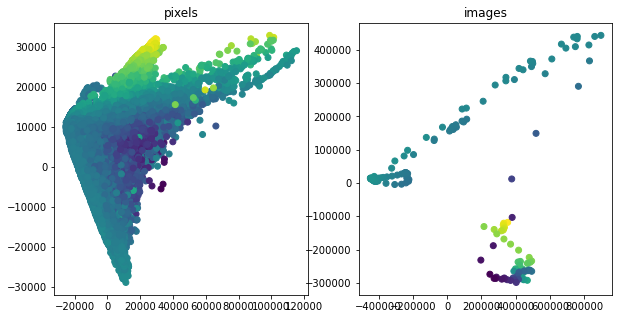

In [8]:
fg,axar = plt.subplots(1,2,figsize=(10,5))
k = 3

ax=axar[0]
ax.set_title('pixels')
pca = PCA(k)
pca.fit(X.T)
Xpc = pca.transform(X.T)
ax.scatter(Xpc[:,0],Xpc[:,1],c=Xpc[:,2])

ax=axar[1]
ax.set_title('images')
pca = PCA(k)
pca.fit(X)
Xpc = pca.transform(X)
ax.scatter(Xpc[:,0],Xpc[:,1],c=Xpc[:,2])

### GMM
- doesnt scale very well. so we fit GMM on first few PCs

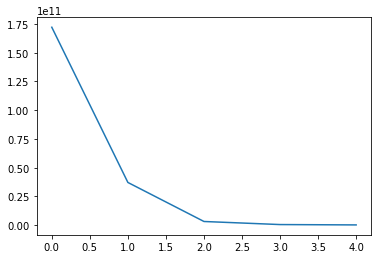

In [9]:
pca = PCA(n_components=5)
pca.fit(X)
plt.plot(pca.explained_variance_)
""" notice low dimensional data - few pcs capture most variance"""

In [10]:
Xpc = pca.transform(X)
Xpc.shape

k = 5

gm = GaussianMixture(n_components=k)
gm.fit(Xpc)

GaussianMixture(n_components=5)

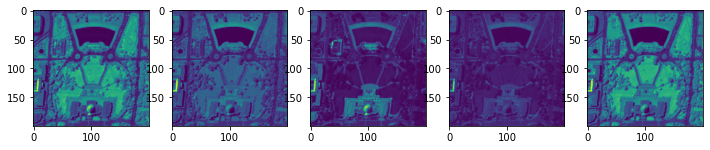

In [11]:
gm.means_.shape
Xh = pca.inverse_transform(gm.means_).reshape(k,200,200)


fg,axar = plt.subplots(1,5,figsize=(12,4));axar=axar.reshape(-1)
for idx in range(k):
  ax=axar[idx]
  ax.imshow(Xh[idx])

In [12]:
""" noticing two means look close to each other, GMM with K=5 seems to overfit. 
also unclear if the data respects the assumption that clusters are gaussian
"""

' noticing two means look close to each other, GMM with K=5 seems to overfit. \nalso unclear if the data respects the assumption that clusters are gaussian\n'

## Problem 3: Survey Responses - The Good, the Bad, and the Ugly (4pts)

Questionnaires, especially online, are often contaminated with incorrect answers, which come in two main forms: malice or lack of interest. For any single question, it is impossible to infer the motivations of a user from their response, but with multiple questions it should be doable. Let's find out with the data in `questionnaire.npy`, which contains 7 Yes/No questions for 100 users.

### Step 1 (3pts)

Assume a mixture model with 3 groups: 

* the Good $G$: users who try to answer the questions
* the Bad $B$: users who don't seem to pay attention
* the Ugly $U$: users who intentionally try to answer the questions incorrectly

Because of the binary nature of the question, the base distributions are of the Binomial type.

Review Murphy 11.2.2 and Exercise 11.3.
Then code your own EM algorithm to solve for the posterior weights $\pi_k$ and mean probabilities $\mu_{jk}$ of each question.
Think about whether you can put non-trivial priors on the component weights.

Try to identify which of the components describes $G$. 
Then report the the posterior weights as well as the mean and variances of the Binomial distribution parameter $\mu_j$ for every question $j$ *only* for the users you believe to be in $G$.

**Hint**: Not every user has the same behavior and motivation. Think about how each user group is expected to perform in the survey, and decide which one is $G$. Plotting the means might help.

**Hint 2**: Pay attention to the value of the $\mu_k$. The log likelihood is ill-defined if $\mu_k\in\{0,1\}$.

## response

In [13]:
import numpy as np

In [14]:
X = np.load('questionnaire.npy')

In [15]:
nclust = 3
num_subs,base_distr_dim = X.shape

In [16]:
## E-step: estimate responsibilties

def p_x_given_z(mu):
  """ likelihood of each obs P(x_i|z_i=k,mu) = P(x_i|mu_k)
  mu: array with means of cluster k for each of 7 questions
  returns: one term per question per person 
  """
  pxz = np.array([
     X[:]*mu[k] + np.abs(1-X[:])*(1-mu[k]) 
    for k in range(nclust)]
  )
  return pxz

def respons(mu,pi):
  """ responsibilities of clusters for each datapoint
  posterior over latents given observations and params
  - responsibility of latents for each datapoint must sum to one  
  """
  pxz = p_x_given_z(mu).prod(2)
  num = np.array([pi[k] * pxz[k] for k in range(nclust)])
  denom = num.sum(0)
  return num/denom


In [17]:
## M-step: update mixture param pi and base param mu

def update_pi(r_ki):
  """ pi is prior over latents
  here we have 7-dim observations 
  r_ik.sum(i,q) / N*7
  """
#   new_pi = r_kij.mean((1,2)) 
  new_pi = r_ki.mean(1)
  return new_pi

def update_mu(X,r_ki):
  """ 
  """
  newmu = np.zeros([3,7])
  for k in range(3):
    newmu[k] = np.sum(np.expand_dims(r_ki[k],1) * X,0) / r_ki[k].sum(0)
  return newmu


In [18]:
## initial state
# random assign 3 latents
pi = np.array([2/3,1/6,1/6])
# binomial param of each mixture
mu = np.random.random((nclust,base_distr_dim)) # mu_kj

def run_EM(mu,pi,nitr=100):
  for itr in range(nitr):
    ## E-step: update responsibilities
    r_ki = respons(mu,pi)
    ## M-step: update mix and base params
    pi = update_pi(r_ki)
    mu = update_mu(X,r_ki)
  return mu,pi



In [19]:
mu,pi = run_EM(mu,pi,nitr=200)

In [20]:
print(
"""
posterior weights are:
""",
pi,
""" 
assume that most people want to perform the survey correct
means of G: 
""",
mu.round(2)[pi.argmax()],
"""
variance of bernoulli is simply pq
""",
mu.round(2)[pi.argmax()]*(1-mu.round(2)[pi.argmax()] )
)


posterior weights are:
 [0.1784192  0.19071343 0.63086736]  
assume that most people want to perform the survey correct
means of G: 
 [0.22 0.8  0.17 0.03 0.05 0.87 0.16] 
variance of bernoulli is simply pq
 [0.1716 0.16   0.1411 0.0291 0.0475 0.1131 0.1344]


In [21]:
ni = 100
D = np.zeros([ni,7])
for it in range(ni):
  mu,pi = run_EM(mu,pi,nitr=200)
  D[it] = mu[pi.argmax()]


In [22]:
""" 
mean and stderr of parameter
"""
D.mean(0),D.std(0)/np.sqrt(ni)

(array([0.2176399 , 0.79878446, 0.17027923, 0.03309987, 0.04836564,
        0.8714578 , 0.16320371]),
 array([4.35218675e-14, 2.48881657e-13, 1.63043373e-13, 3.30318138e-13,
        5.96524970e-14, 8.11791049e-14, 2.16654912e-13]))

### Step 2 (1pts)

Now that you have identified the groups, rerun the the EM with a prior on the mixing weights:
$p(\pi_G)=0.8$, $p(\pi_B)=0.1$, $p(\pi_U)=0.1$. Plot the results.

Can you construct an alternative estimator of $\mu_j$ using not just the result for $G$? If so, what is the analytic form of this estimator?

## response

above we found the estimators of G with:

we can find the G strategy with:

$\pi_G = argmax_\pi$

then we find the U and B cluster with:

$\mu_U = argmin_\mu KL(\mu||1-\mu_G)$

$\mu_B = argmax_{\mu_{k}} H(\mu_{k})$

where $H(\mu_k)$ is the binary entropy function

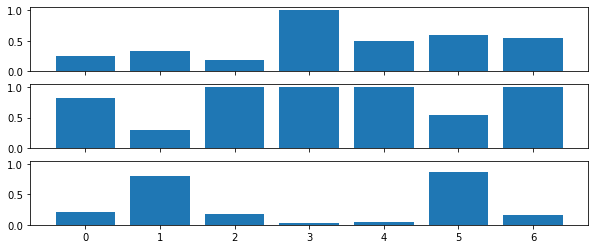

In [23]:
mu,pi = run_EM(mu,[.8,.1,.1],nitr=200)
fg,axar = plt.subplots(3,figsize=(10,4),sharex=True,sharey=True);
for idx in range(3):
  ax=axar[idx]
  ax.bar(range(7),mu[idx])